In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
# sklearn(scikit-learn) is one of the famous ML package in python
# these are datasets
from sklearn.datasets import make_moons, make_circles
# splitting train data and test data
from sklearn.model_selection import train_test_split
# K Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
# Support Vector Machine
from sklearn.svm import SVC

# 0. Classification

**What is classification?**

Classification is a machine learning technique to categorize data points based on their attributes (labels)

(0.0, 1.0)

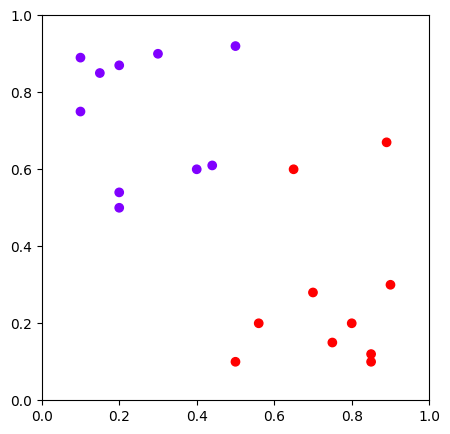

In [2]:
# sample data
data_x=np.array([0.9,0.85,0.56,0.65,0.5,0.89,0.7, 0.3,0.1,0.2,0.5,0.4,0.2,0.44,0.8,0.75,0.85,0.10,0.15,0.20])
data_y=np.array([0.3,0.12,0.2,0.6,0.1,0.67,0.28, 0.9,0.89,0.5,0.92,0.6,0.54,0.61,0.2,0.15,0.10,0.75,0.85,0.87])
colors=np.array([1,1,1,1,1,1,1,0,0,0,0,0,0,0,1,1,1,0,0,0])
plt.figure(figsize=(5,5))
plt.scatter(data_x,data_y,c=colors,cmap='rainbow',vmin=0,vmax=1);plt.xlim(0,1);plt.ylim(0,1)

We will learn how to classify data points(1: red, 0: purple) in this space.

# 1. Support Vector Machine

We can imagine a linear line that can 'well' classify these data points.
Before finding the classification line, let's think about the two boundary lines, called 'Support Vectors'. Support vectors are parralel lines that are located at the boundary data points

0.15556349186104046


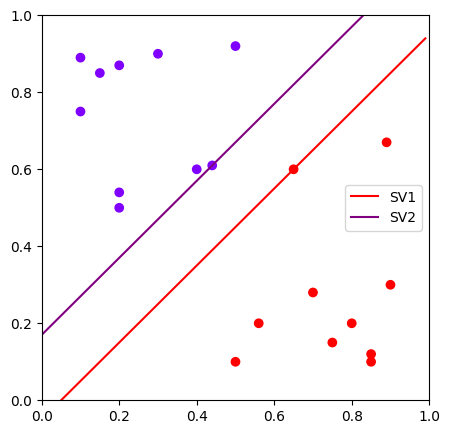

In [3]:
slope=1
intercept1=np.max(data_y[colors==1]-slope*data_x[colors==1])
intercept2=np.min(data_y[colors==0]-slope*data_x[colors==0])
distance=(intercept2-intercept1)/(1+slope**2)**0.5
print(distance)
xs=np.arange(0,1,0.01)


plt.figure(figsize=(5,5))
plt.scatter(data_x,data_y,c=colors,cmap='rainbow',vmin=0,vmax=1);plt.xlim(0,1);plt.ylim(0,1)
plt.plot(xs,xs*slope+intercept1,c='r',label='SV1')
plt.plot(xs,xs*slope+intercept2,c='purple',label='SV2')
plt.legend()

So, how we can find 'best' support vectors? If the distance between two support vectors is large, we can say that these data points are 'well classified'

Our goal is to maximize 'Loss function'(distance between 2 support vectors)

We can randomly choose initial values and use gredient descent(ascent) method.


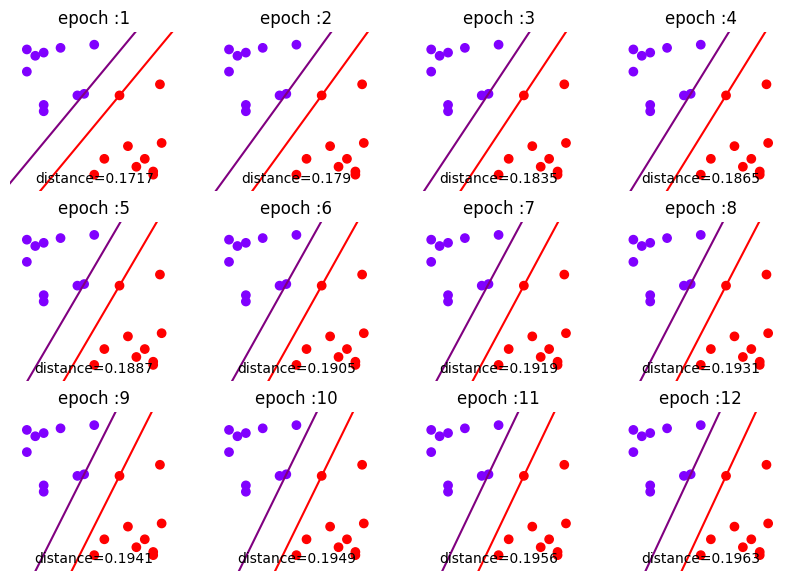

In [4]:
def distance_SV(slope):
  intercept1=np.max(data_y[colors==1]-slope*data_x[colors==1])
  intercept2=np.min(data_y[colors==0]-slope*data_x[colors==0])
  distance=(intercept2-intercept1)/(1+slope**2)**0.5
  return intercept1,intercept2,distance

xs=np.arange(0,1,0.01)
epochs=12
slope=1
de=0.01
c=4
fig,axes=plt.subplots(3,4,figsize=(10,7))
for epoch in range(epochs):
  dslope=distance_SV(slope+de)[2]-distance_SV(slope)[2]
  slope+=c*dslope/de
  intercept1,intercept2,distance=distance_SV(slope)
  ax=axes.flatten()[epoch]
  ax.scatter(data_x,data_y,c=colors,cmap='rainbow',vmin=0,vmax=1);ax.set_xlim(0,1);ax.set_ylim(0,1)
  ax.plot(xs,xs*slope+intercept1,c='r',label='SV1')
  ax.plot(xs,xs*slope+intercept2,c='purple',label='SV2')
  ax.axis('off')
  ax.set_title('epoch :'+str(epoch+1))
  ax.text(0.5,0.05,'distance='+str(round(distance,4)),horizontalalignment='center')

Epoch is the number of iterations.

As epochs increse, we can see the distance is increasing and data points are well seperated by two support vectors.

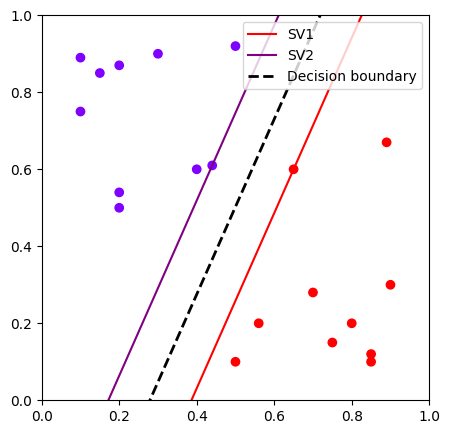

In [5]:
xs=np.arange(0,1,0.01)


plt.figure(figsize=(5,5))
plt.scatter(data_x,data_y,c=colors,cmap='rainbow',vmin=0,vmax=1);plt.xlim(0,1);plt.ylim(0,1)
plt.plot(xs,xs*slope+intercept1,c='r',label='SV1')
plt.plot(xs,xs*slope+intercept2,c='purple',label='SV2')
plt.plot(xs,xs*slope+(intercept1+intercept2)/2,c='k',lw=2,ls='--',label='Decision boundary')
plt.legend(loc=1)

This method is called 'Linear Support Vector Machine'.

But this method is not applicable when data points are mixed.

More general method is 'Support Vector Machine'


In [6]:
from sklearn.svm import SVC
# creating SVC model with hyperparameters
model=SVC(kernel='linear',C=1000)

We can choose kernels in SVC. Notice that SVC with 'linear kernel' is slightly different from the 'linear SVC' function.

In [7]:
# reshape data points
input=np.array([data_x,data_y]).T
label=colors
print(input.shape)
print(label.shape)

(20, 2)
(20,)


In [8]:
# fitting data points to the model
model.fit(input,label)

SVC(C=1000, kernel='linear')

In [9]:
# we can put test data into the model and see the prediction result
test_data=[[0.3,0.7],[0.5,0.55],[0.7,0.3]]
model.predict(test_data)

array([0, 0, 1])

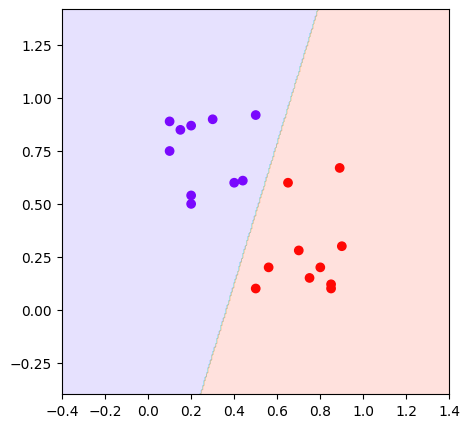

In [10]:
# function for plotting
def plot(model,X,Y):
  x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
  y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
  xrange=np.linspace(x_min,x_max,300)
  yrange=np.linspace(y_min,y_max,300)
  xx,yy=np.meshgrid(xrange,yrange)
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
  plt.figure(figsize=(5,5))
  plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='rainbow',vmin=0,vmax=1)
  plt.contourf(xx, yy, Z, cmap='rainbow', alpha=0.15)
  plt.show()

plot(model,input,label)

in SVC, we can use 'Kernel method'. by using Kernel method, we can map data points into higher dimension. In this dimension, classification could be much easier.

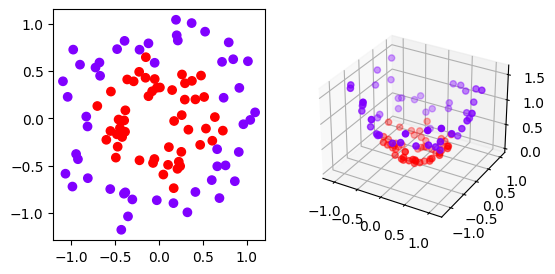

In [11]:
input_circle,label_circle=make_circles(noise=0.15, factor=0.5, random_state=1)
fig,[ax0,ax1]=plt.subplots(1,2,figsize=(6,3))
ax0.scatter(input_circle[:,0],input_circle[:,1],c=label_circle,cmap='rainbow')
ax1.axis('off')
ax1 = fig.add_subplot(122,projection='3d')
kernel = lambda x,y: x**2+y**2
new_output=kernel(input_circle[:,0],input_circle[:,1])
ax1.scatter(input_circle[:,0],input_circle[:,1],new_output,c=label_circle,cmap='rainbow')

In the first figure, it seems difficult to classify by linear line.

But if we use kernel z=f(x,y)=x^2+y^2, we can classify data points in z-space.

There are various kernel functions: 'linear', 'rbf', 'sigmoid', 'poly', ...

**SVC with Circle data points**

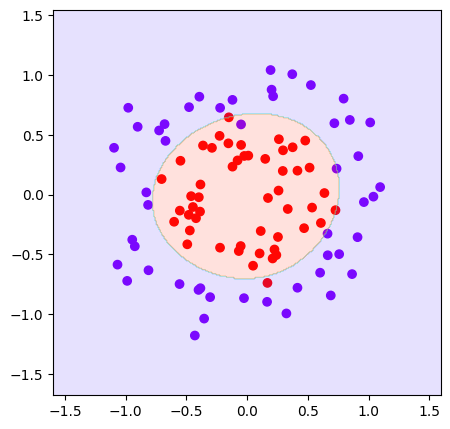

In [12]:
input_circle,label_circle=make_circles(noise=0.15, factor=0.5, random_state=1)
model=SVC(kernel='rbf',C=1, gamma=1)
model.fit(input_circle,label_circle)
plot(model,input_circle,label_circle)

**SVC with Moon data points**

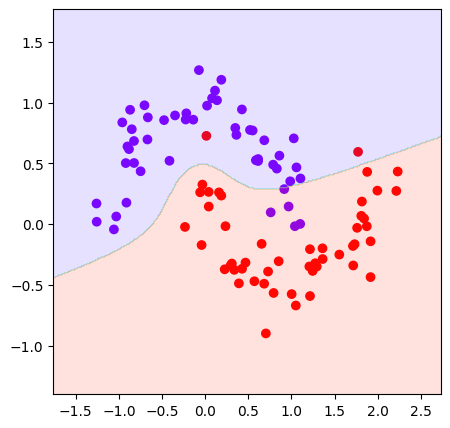

In [13]:
input_moon,label_moon=make_moons(noise=0.15, random_state=1)
model=SVC(kernel='poly',C=1)
model.fit(input_moon,label_moon)
plot(model,input_moon,label_moon)

# 2. KNN (K-Nearest Neighbors)

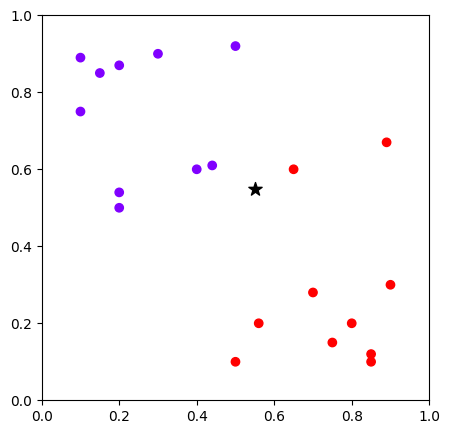

In [14]:
plt.figure(figsize=(5,5))
plt.scatter(data_x,data_y,c=colors,cmap='rainbow');plt.xlim(0,1);plt.ylim(0,1)
plt.scatter(0.55,0.55,c='k',s=100,marker='*')

If there is a new data point (black star), how can we classify this point? red or purple?

One way is to classify into the most frequent color among nearest neighbors

In [15]:
distance_list=[]
for i in range(len(data_x)):
  distance_list.append(((data_x[i]-0.55)**2+(data_y[i]-0.5)**2)**0.5) # calculate distance from the neighbors
nearest_ranks=np.argpartition(np.array(distance_list),1)  # sort distance list
print(colors[nearest_ranks[0]])   # find the nearest neighbor
print(data_x[nearest_ranks[0]],data_y[nearest_ranks[0]]) # coordinates of nearest neighbor

1
0.65 0.6


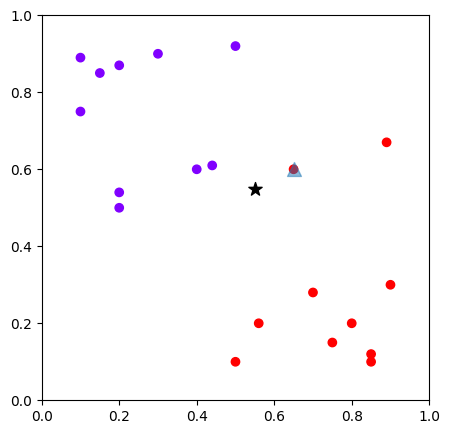

In [16]:
plt.figure(figsize=(5,5))
plt.scatter(data_x,data_y,c=colors,cmap='rainbow');plt.xlim(0,1);plt.ylim(0,1)
plt.scatter(0.55,0.55,c='k',s=100,marker='*')
plt.scatter(data_x[nearest_ranks[0]],data_y[nearest_ranks[0]],marker='^',s=100,alpha=0.5)

The triangular mark is the 1st nearest neighbor. So we can classify black star to the red color.

In [17]:
k=3
nearest_ranks=np.argpartition(np.array(distance_list),k)
print(colors[nearest_ranks[:k]])
print(data_x[nearest_ranks[:k]],data_y[nearest_ranks[:k]])

[1 0 0]
[0.65 0.44 0.4 ] [0.6  0.61 0.6 ]


But if we count 3 nearest neighbors, most frequent color is purple.

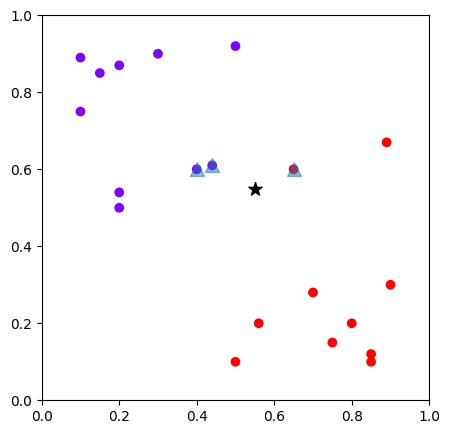

In [18]:
plt.figure(figsize=(5,5))
plt.scatter(data_x,data_y,c=colors,cmap='rainbow');plt.xlim(0,1);plt.ylim(0,1)
plt.scatter(0.55,0.55,c='k',s=100,marker='*')
plt.scatter(data_x[nearest_ranks[:k]],data_y[nearest_ranks[:k]],marker='^',s=100,alpha=0.5)

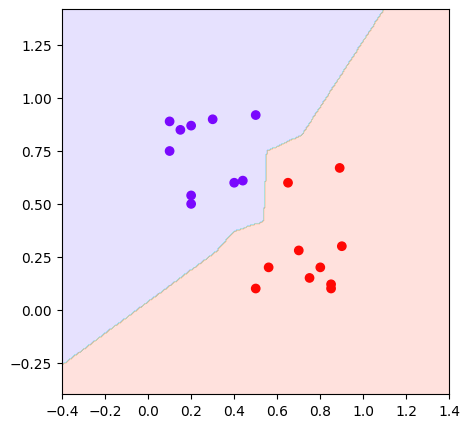

[1]


In [19]:
# using sklearn module

from sklearn.neighbors import KNeighborsClassifier as KNN
model=KNN(n_neighbors=1)
model.fit(input,label)
plot(model,input,label)
print(model.predict([[0.55,0.5]]))

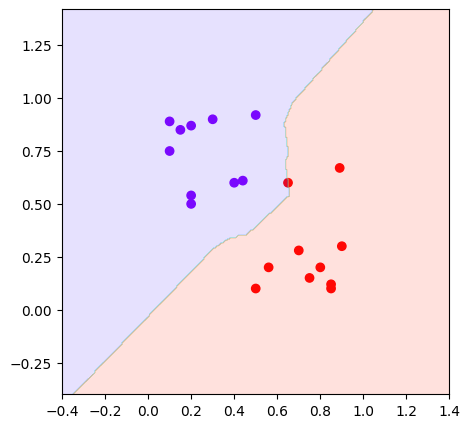

In [20]:
model=KNN(n_neighbors=3)
model.fit(input,label)
plot(model,input,label)

**KNN with Circle data points**

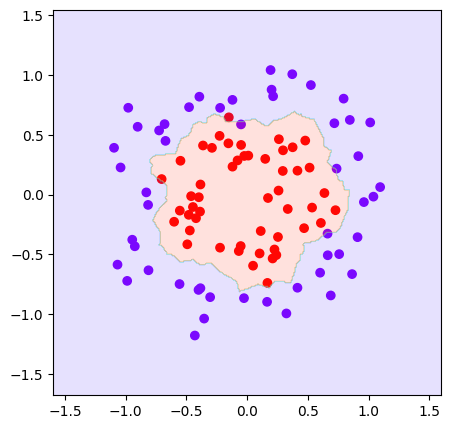

In [21]:
input_circle,label_circle=make_circles(noise=0.15, factor=0.5, random_state=1)
model=KNN(3)
model.fit(input_circle,label_circle)
plot(model,input_circle,label_circle)

**KNN with Moon data points**

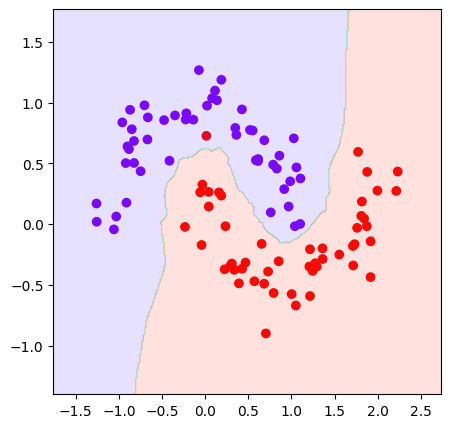

In [22]:
input_moon,label_moon=make_moons(noise=0.15, random_state=1)
model=KNN(5)
model.fit(input_moon,label_moon)
plot(model,input_moon,label_moon)

SVM and KNN are two popular machine learning algorithms used for classification and regression problems. Here are some strengths and weaknesses of both algorithms:

Support Vector Machines (SVM):

Strengths:

SVM is effective in high-dimensional spaces and is particularly useful when the number of features is greater than the number of samples.
SVM is robust against overfitting, especially when the margin is correctly set using the 'C' and 'gamma' hyperparameters.
SVM can handle both linear and nonlinear classification and regression problems by using kernel functions.
Weaknesses:

SVM can be computationally expensive, particularly when dealing with large datasets or complex kernel functions.
SVM does not work well with noisy data, as it is sensitive to outliers in the training data.
SVM can be difficult to interpret and understand, particularly when using nonlinear kernel functions.
K-Nearest Neighbors (KNN):

Strengths:

KNN is simple to implement and easy to understand, making it a good choice for beginners.
KNN is non-parametric, meaning it does not make assumptions about the underlying data distribution.
KNN can handle both classification and regression problems and can be easily adapted to handle multiclass problems.
Weaknesses:

KNN can be computationally expensive, particularly when the dataset is large or the number of features is high.
KNN can be sensitive to the choice of the k parameter and the distance metric used to calculate distances between instances.
KNN does not work well with datasets that have a large number of irrelevant features, as this can dilute the importance of the relevant features.
In summary, both SVM and KNN have their strengths and weaknesses, and the choice of algorithm ultimately depends on the specific problem at hand, the size and nature of the dataset, and the available computational resources.